In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
dim_date = pd.read_csv('/content/dim_date.csv')
dim_hotels = pd.read_csv('/content/dim_hotels.csv')
dim_rooms = pd.read_csv('/content/dim_rooms.csv')
fact_booking = pd.read_csv('/content/fact_bookings.csv')
fact_aggregated_bookings = pd.read_csv('/content/fact_aggregated_bookings.csv')

# EDA

In [9]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [10]:
dim_date.head(10)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
5,06-May-22,May 22,W 19,weekeday
6,07-May-22,May 22,W 19,weekend
7,08-May-22,May 22,W 20,weekend
8,09-May-22,May 22,W 20,weekeday
9,10-May-22,May 22,W 20,weekeday


In [11]:
dim_date.describe()

,date,mmm yy,week no,day_type
count,92,92,92,92
unique,92,3,14,2
top,01-May-22,May 22,W 19,weekeday
freq,1,31,7,65


In [14]:
dim_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      object
 1   room_class  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


In [17]:
dim_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [18]:
dim_rooms.describe()

,room_id,room_class
count,4,4
unique,4,4
top,RT1,Standard
freq,1,1


In [19]:
dim_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 928.0+ bytes


In [34]:
dim_hotels.describe()

,property_id
count,25.000000
mean,18040.640000
std,1122.436371
min,16558.000000
25%,17558.000000
50%,17564.000000
75%,18563.000000
max,19563.000000


In [20]:
dim_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


<Axes: ylabel='property_name'>

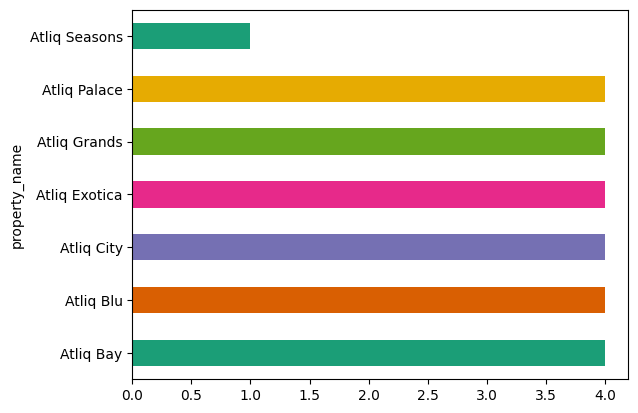

In [30]:
dim_hotels.groupby('property_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

<Axes: ylabel='category'>

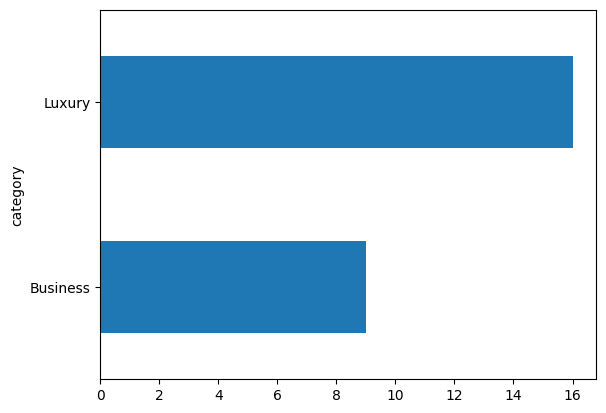

In [28]:
dim_hotels.groupby('category').size().plot(kind='barh')

<Axes: ylabel='city'>

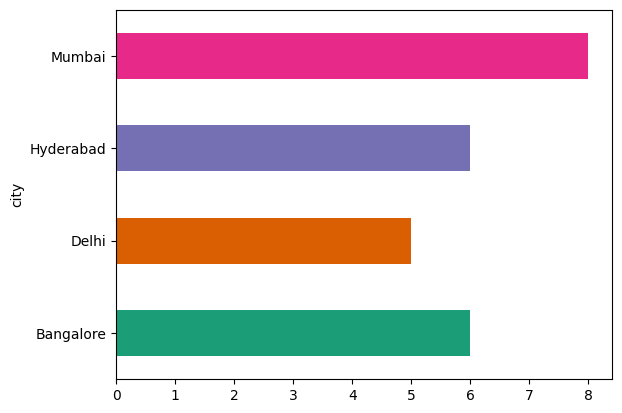

In [25]:
dim_hotels.groupby('city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

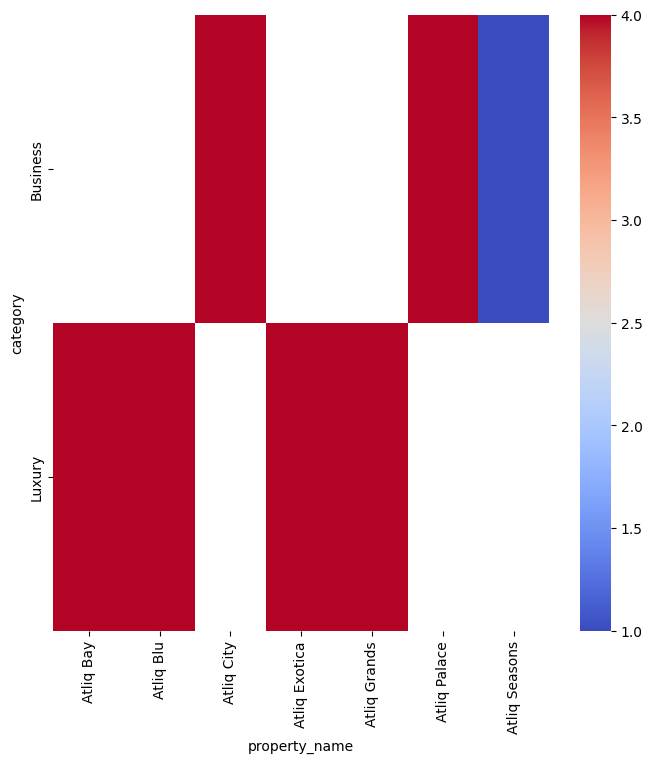

In [23]:
plt.subplots(figsize=(8, 8))
heatmapp = pd.DataFrame({
    x_label: grp['category'].value_counts()
    for x_label, grp in dim_hotels.groupby('property_name')
})
sns.heatmap(heatmapp, cmap='coolwarm')
plt.xlabel('property_name')
_ = plt.ylabel('category')

In [31]:
fact_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [35]:
fact_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [39]:
fact_booking.head(10)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,2022-05-01,2022-05-01,2022-05-03,2,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,2022-04-28,2022-05-01,2022-05-06,2,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,2022-04-26,2022-05-01,2022-05-03,2,RT1,logtrip,NaN,No Show,9100,9100
8,May012216558RT19,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,tripster,NaN,Checked Out,9100,9100
9,May012216558RT110,16558,2022-04-28,2022-05-01,2022-05-02,1,RT1,others,4.0,Checked Out,9100,9100


<Axes: ylabel='booking_platform'>

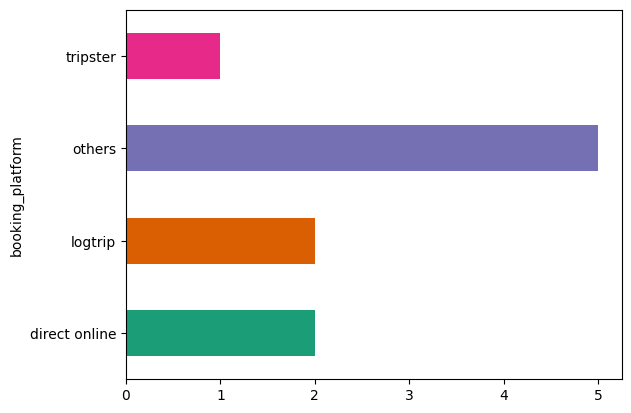

In [38]:
_df_33.groupby('booking_platform').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

<Axes: ylabel='booking_date'>

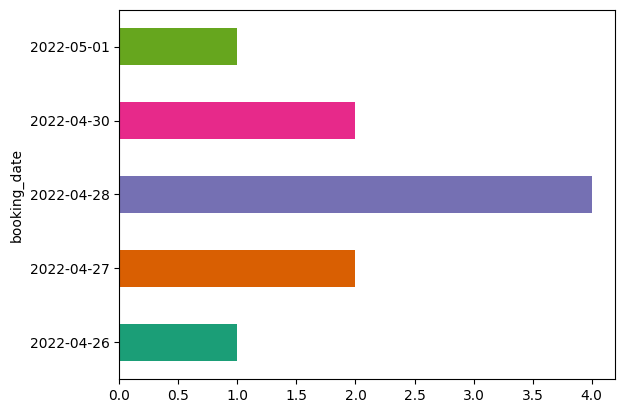

In [37]:
_df_31.groupby('booking_date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

In [40]:
fact_aggregated_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB


In [41]:
fact_aggregated_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9200.000000
mean,18040.640000,14.629348,25.280000
std,1099.818325,7.591770,11.440971
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,43.000000,50.000000


In [47]:
fact_aggregated_bookings.head(10)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19
5,17560,01-May-22,RT1,28,40
6,19558,01-May-22,RT1,25,40
7,19560,01-May-22,RT1,23,26
8,17561,01-May-22,RT1,22,26
9,16560,01-May-22,RT1,24,34


<Axes: xlabel='successful_bookings', ylabel='capacity'>

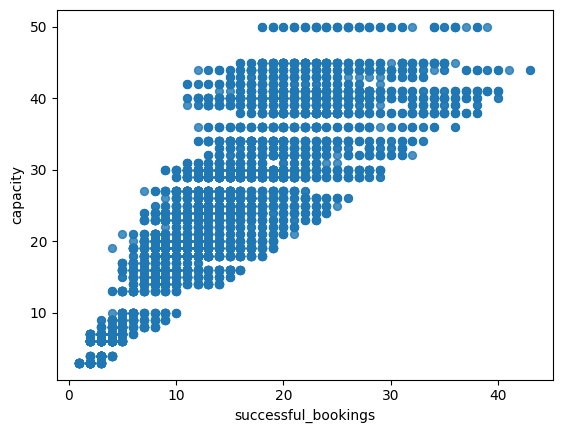

In [46]:
fact_aggregated_bookings.plot(kind='scatter', x='successful_bookings', y='capacity', s=32, alpha=.8)

<Axes: title={'center': 'successful_bookings'}, ylabel='Frequency'>

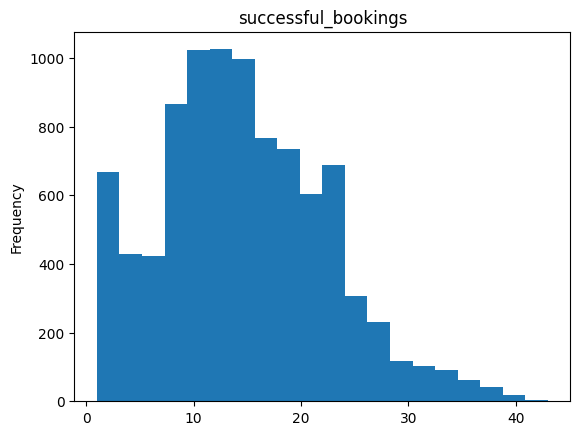

In [44]:
fact_aggregated_bookings['successful_bookings'].plot(kind='hist', bins=20, title='successful_bookings')